In [1]:
import torch, random
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
%matplotlib inline
import timm
# import mplhep as hep
# plt.style.use([hep.style.ROOT, hep.style.firamath])
torch.manual_seed(0)

use_cuda = torch.cuda.is_available()
print("cuda: ", use_cuda)
device = torch.device(f"cuda:0" if use_cuda else "cpu")
print(device)

cuda:  True
cuda:0


In [60]:
import random

total_indices = list(range(10))
random.shuffle(total_indices)
print(total_indices)


[5, 2, 4, 7, 9, 1, 3, 6, 0, 8]


In [ ]:
# n_train = 105
# idxs = np.random.permutation(n_train)
# print('>> N samples: %d'%(len(idxs)))
# val_ratio = int(0.10*len(idxs))
# print("val_traio ", val_traio)
# idxs_train = idxs[val_ratio:n_train]
# idxs_val = idxs[:val_ratio]
# np.savez('idxs_train+val.npz', idxs_train=idxs_train, idxs_val=idxs_val)
# assert len(idxs_train)+len(idxs_val) <= len(idxs), '%d vs. %d'%(len(idxs_train)+len(idxs_val), len(idxs))
# print("idxs_train ", idxs_train)
# print("idxs_val ", idxs_val)

In [ ]:
# data = np.load('idxs_train+val.npz')
# data['idxs_train'].tolist()

In [ ]:
int(10005.2)

10005

In [9]:
# Generate 1000 random tensors
total_number = 5
random_tensors = [torch.randn(13, 125, 125) for _ in range(total_number)]
data = torch.stack(random_tensors)
y = [(torch.rand(1) * 16) + 1.2 for _ in range(total_number)]
y = torch.stack(y)




In [ ]:
# NN network define Model class which inherits from Module
class Model_nn(nn.Module):
  def __init__(self,infetures=13*125*125, outfeatures=1):
    super().__init__()
    self.fc1 = nn.Linear(infetures, 10)
    self.fc2 = nn.Linear(10,20)
    self.out = nn.Linear(20,outfeatures)

  def forward(self,x):
    # print(x.shape)
    x = F.relu(self.fc1(x))
    # print(x.shape)
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

model = Model_nn()
# define loos function


In [ ]:
# !wget https://raw.githubusercontent.com/ironjr/grokfast/main/grokfast.py
from grokfast import gradfilter_ma, gradfilter_ema

--2024-07-11 20:52:08--  https://raw.githubusercontent.com/ironjr/grokfast/main/grokfast.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1703 (1.7K) [text/plain]
Saving to: ‘grokfast.py’

grokfast.py         100%[===================>]   1.66K  --.-KB/s    in 0s      

2024-07-11 20:52:09 (23.2 MB/s) - ‘grokfast.py’ saved [1703/1703]



In [ ]:






criterian = nn.MSELoss()
# define optimozer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2,threshold=0.1,min_lr=1e-6,verbose=True,threshold_mode='rel' )
epochs = 5
total_loss = []
alpha = 0.99
lamb = 2

model.train()
for epoch in range(epochs):
  total_loss_ = 0
  for i in range(len(data)):
    x = data
    X = x.view(x.size(0), -1)
    # print(X.shape)
    Y = y
    # print("y", Y.shape)

    logit = model(X)
    print("logit", logit)
    loss = criterian(logit, Y)
    # print(loss.item())
    total_loss_+=loss.item()
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
  lr_scheduler.step(np.mean(total_loss_/(i+1)))
  total_loss.append(np.mean(total_loss_/(i+1)))
  print(f"Traing Epoch: {epoch+1} loss {np.mean(total_loss_/(i+1))}, Learning Rate: {optimizer.param_groups[0]['lr']}")
  wandb.log({"Train_loss": total_loss_/(i+1)})
plt.plot(range(epochs), total_loss)



NameError: name 'wandb' is not defined

Traing Epoch: 1 loss 80.60882858276368, Learning Rate: 0.001
Traing Epoch: 2 loss 42.12768501281738, Learning Rate: 0.001
Traing Epoch: 3 loss 32.38599021911621, Learning Rate: 0.001
Traing Epoch: 4 loss 28.445429573059084, Learning Rate: 0.001
Traing Epoch: 5 loss 25.0222066116333, Learning Rate: 0.001
Traing Epoch: 6 loss 22.08802917480469, Learning Rate: 0.001
Traing Epoch: 7 loss 20.63687057495117, Learning Rate: 0.001
Traing Epoch: 8 loss 19.25774139404297, Learning Rate: 0.001
Traing Epoch: 9 loss 18.532860298156738, Learning Rate: 0.001
Traing Epoch: 10 loss 17.497678756713867, Learning Rate: 0.001
Traing Epoch: 11 loss 17.01045825958252, Learning Rate: 0.001
Traing Epoch: 12 loss 16.93424633026123, Learning Rate: 0.001
Traing Epoch: 13 loss 15.951206092834473, Learning Rate: 0.001
Traing Epoch: 14 loss 15.527652893066406, Learning Rate: 0.0001
Traing Epoch: 15 loss 15.349311847686767, Learning Rate: 0.0001
Traing Epoch: 16 loss 15.035902328491211, Learning Rate: 0.0001
Traing E

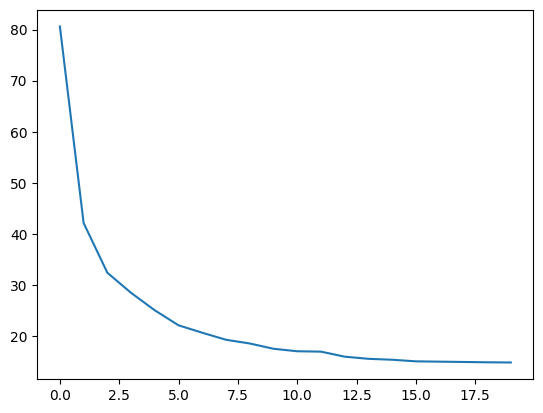

In [ ]:
criterian = nn.MSELoss()
# define optimozer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2,threshold=0.1,min_lr=1e-6,verbose=True,threshold_mode='rel' )
epochs = 20
total_loss = []
alpha = 0.99
lamb = 2
grads = None
model.train()
for epoch in range(epochs):
  total_loss_ = 0
  for i in range(len(data)):
    x = data
    X = x.view(x.size(0), -1)
    # print(X.shape)
    Y = y
    # print("y", Y.shape)

    logit = model(X)
    # print("logit", logit)
    loss = criterian(logit, Y)
    # print(loss.item())
    total_loss_+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    grads = gradfilter_ema(model, grads=grads, alpha=alpha, lamb=lamb)
    optimizer.step()
  lr_scheduler.step(np.mean(total_loss_/(i+1)))
  total_loss.append(np.mean(total_loss_/(i+1)))
  print(f"Traing Epoch: {epoch+1} loss {np.mean(total_loss_/(i+1))}, Learning Rate: {optimizer.param_groups[0]['lr']}")
plt.plot(range(epochs), total_loss)



In [ ]:
# ### CNN
# from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
# from torchvision.utils import make_grid

In [ ]:
class model_cnn(nn.Module):
  def __init__(self, in_channels=13, final_out_channels=1):
    super().__init__()
    self.in_channels = in_channels
    self.final_out_channels = final_out_channels
    self.conv1 = nn.Conv2d(in_channels = in_channels, out_channels=4,kernel_size=3,stride=1, padding=1)
    self.conv2 = nn.Conv2d(in_channels = 4,out_channels=8,kernel_size=3)
    self.conv3 = nn.Conv2d(in_channels = 8,out_channels=16,kernel_size=3)
    self.conv4 = nn.Conv2d(in_channels = 16,out_channels=32,kernel_size=3)
    self.fc1 = nn.Linear(in_features = 32*6*6, out_features= 1024)
    self.fc2 = nn.Linear(in_features = 1024, out_features= 512)
    self.fc3 = nn.Linear(in_features = 512, out_features= 256)
    self.fc4 = nn.Linear(in_features = 256, out_features= 128)
    self.fc5 = nn.Linear(in_features = 128, out_features= 64)
    self.fc6 = nn.Linear(in_features = 64, out_features= 32)
    self.fc7 = nn.Linear(in_features = 32, out_features= final_out_channels)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2) # 2x2 kernal size and strude 2
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2) # 2x2 kernal size and strude 2
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x,2) # 2x2 kernal size and strude 2
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x,2) # 2x2 kernal size and strude 2
    # print(x.shape)
    x =  x.view(x.size(0), -1)
    # print(x.shape)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.relu(self.fc6(x))
    x = self.fc7(x)
    return x


model = model_cnn(13,1)

Traing Epoch: 1 loss 12.77777624130249, Learning Rate: 0.001
Traing Epoch: 2 loss 17.554045104980467, Learning Rate: 0.001
Traing Epoch: 3 loss 6.505730056762696, Learning Rate: 0.001
Traing Epoch: 4 loss 5.681490898132324, Learning Rate: 0.001
Traing Epoch: 5 loss 5.79616060256958, Learning Rate: 0.001
Traing Epoch: 6 loss 3.93190860748291, Learning Rate: 0.001
Traing Epoch: 7 loss 3.566255283355713, Learning Rate: 0.001
Traing Epoch: 8 loss 3.5119922161102295, Learning Rate: 0.001
Traing Epoch: 9 loss 3.1933736324310305, Learning Rate: 0.001
Traing Epoch: 10 loss 2.9586066246032714, Learning Rate: 0.001


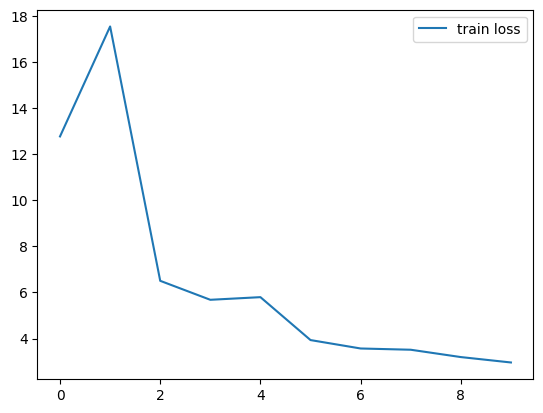

In [ ]:
criterian = nn.MSELoss()
# define optimozer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2,threshold=0.1,min_lr=1e-6,verbose=True,threshold_mode='rel' )

epochs = 10
total_loss = []
model.train()
for epoch in range(epochs):
  total_loss_ = 0
  for i in range(len(data)):
    X = data
    # print(X[0])
    Y = y
    # print("y shape", Y.shape)

    logit = model(X)
    # print("logit", logit)
    loss = criterian(logit, Y)
    # print(loss.item())
    total_loss_+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  lr_scheduler.step(np.mean(total_loss_/(i+1)))
  total_loss.append(np.mean(total_loss_/(i+1)))
  print(f"Traing Epoch: {epoch+1} loss {np.mean(total_loss_/(i+1))}, Learning Rate: {optimizer.param_groups[0]['lr']}")
plt.plot(range(epochs), total_loss, label="train loss")
plt.legend()




### Old Resnet Model

In [15]:
class ResBlock(nn.Module):

    # def __init__(self,nblocks, in_channels, out_channels): // batch normalization controll.
    def __init__(self, in_channels, out_channels):
        super(ResBlock, self).__init__()
        self.downsample = out_channels//in_channels
        # self.nblocks = nblocks
        # print("downsample----",out_channels//in_channels)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=self.downsample, padding=1)
        # print("in_channels,out_channels-----",in_channels, out_channels)
        # self.bn1 = nn.BatchNorm2d(out_channels) # batch normalization.
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        # self.bn2 = nn.BatchNorm2d(out_channels) # batch normalization.
        self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=self.downsample)

    def forward(self, x):
        residual = x
        # print("x.shape/residual initial-----",x.shape)
        out = self.conv1(x)
        # print("x.shape after conv1-----",out.shape)
        # if self.nblocks!=1:
        #     out  = self.bn1(x)
        #     # print("x.shape after bn1-----",out.shape)
        out = self.relu(out)
        out = self.conv2(out)
        # print("x.shape after conv2-----",out.shape)ß
        # if self.nblocks!=1:
        #     out  = self.bn2(x)
        #     # print("x.shape after bn2-----",out.shape)
        if self.downsample > 1:
            residual = self.shortcut(x)
            # print("residual after downsample-----",residual.shape)

        out += residual
        out = self.relu(out)

        return out

class ResNet(nn.Module):

    #def __init__(self, in_channels, nblocks, fmaps, fc_nodes, fc_layers):
    def __init__(self, in_channels, nblocks, fmaps):
        super(ResNet, self).__init__()
        self.fmaps = fmaps
        self.nblocks = nblocks
        #self.fc_nodes = fc_nodes
        #self.fc_layers = fc_layers

        #self.conv0 = nn.Conv2d(in_channels, fmaps[0], kernel_size=7, stride=2, padding=1)

        self.conv0 = nn.Conv2d(in_channels, fmaps[0], kernel_size=7, stride=1, padding=1)
        # self.bn0 = nn.BatchNorm2d(fmaps[0]) # batch normalization.

        self.layer1 = self.block_layers(self.nblocks, [fmaps[0],fmaps[0]])

        self.layer2 = self.block_layers(1, [fmaps[0],fmaps[1]])

        self.layer3 = self.block_layers(self.nblocks, [fmaps[1],fmaps[1]])

        self.layer4 = self.block_layers(1, [fmaps[1],fmaps[2]])

        self.layer5 = self.block_layers(self.nblocks, [fmaps[2],fmaps[2]])

        self.layer6 = self.block_layers(1, [fmaps[2],fmaps[3]])

        self.layer7 = self.block_layers(self.nblocks, [fmaps[3],fmaps[3]])

        # no FC
        #if self.fc_layers == 0:
        # self.fc = nn.Linear(self.fmaps[1], 1)
        self.fc = nn.Linear(self.fmaps[3]+2, 1)
        # with FC
        #else:
        #    #self.fcin = nn.Linear(self.fmaps[1], self.fc_nodes)
        #    self.fcin = nn.Linear(self.fmaps[1]+2, self.fc_nodes)
        #    self.fc = nn.Linear(self.fc_nodes, self.fc_nodes)
        #    self.fcout = nn.Linear(self.fc_nodes, 1)
        #    self.drop = nn.Dropout(p=0.2)
        #    self.relu = nn.ReLU()
        self.GlobalMaxPool2d = nn.AdaptiveMaxPool2d((1,1))

    def block_layers(self, nblocks, fmaps):
        layers = []
        for _ in range(nblocks):
            layers.append(ResBlock(fmaps[0], fmaps[1]))
            # layers.append(ResBlock(nblocks,fmaps[0], fmaps[1]))
        return nn.Sequential(*layers)

    def forward(self, X):

        # print("X.shape initial-----",X[0].shape)
        # print("layer0-----------------------------------------------------------------------------")
        x = self.conv0(X[0])
        # print("x.shape after conv0-----",x.shape)
        # x = self.bn0(x)
        # # print("x.shape after bn0-----",x.shape)
        x = F.relu(x)
        #x = F.max_pool2d(x, kernel_size=2)
        # print(x.shape)
        # print("layer1------------------------------------------------------------------------------")
        x = self.layer1(x)
        # print("x.shape after layer1-----",x.shape)
        # print("layer2 connecting layer--------------------------------------------------------------")
        x = self.layer2(x)
        # print("x.shape after layer2-----",x.shape)
        # print("layere 3------------------------------------------------------------------------------")
        x = self.layer3(x)
        # print("x.shape after layer3-----",x.shape)
        # print("layere 4 connecting------------------------------------------------------------------------------")
        x = self.layer4(x)
        # print("x.shape after layer4-----",x.shape)
        # print("layere 5------------------------------------------------------------------------------")
        x = self.layer5(x)
        # print("x.shape after layer5-----",x.shape)
        # print("layere 6 connecting------------------------------------------------------------------------------")
        x = self.layer6(x)
        # print("x.shape after layer6-----",x.shape)
        # print("layere 7------------------------------------------------------------------------------")
        x = self.layer7(x)
        # print("x.shape after layer7-----",x.shape)
        #x = F.max_pool2d(x, kernel_size=x.size()[2:])
        #x = F.max_pool2d(x, kernel_size=x.size()[2:])
        x = self.GlobalMaxPool2d(x)
        # print("x.shape after GlobalMaxPool2d-----",x.shape)
        x = x.view(x.size()[0], self.fmaps[3])
        # concat with seed pos
        # print("x, X[1], X[2]-----",x.shape, X[1].shape, X[2].shape)
        x = torch.cat([x, X[1], X[2]], 1)
        # print("x after torch.cat---------",x.shape)
        # FC
        #if self.fc_layers == 0:
        # print("layere fc------------------------------------------------------------------------------")
        x = self.fc(x)
        # print("x.shape after self.fc-----",x.shape)
        #else:
        #    x = self.fcin(x)
        #    for _ in range(self.fc_layers):
        #        x = self.fc(x)
        #        x = self.relu(x)
        #        x = self.drop(x)
        #    x = self.fcout(x)
        # print("x------------",x)
        return x
    
in_channels=13
model = ResNet(in_channels, 3, [8,16,32,64])
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {num_params}')

x = torch.randn(10, in_channels, 125, 125)
ieta = torch.randn(10)
iphi = torch.randn(10)
iphi = iphi.view(-1, 1)
ieta = ieta.view(-1, 1)
model([x,iphi,ieta]).shape

Total number of parameters: 391931


torch.Size([10, 1])

In [12]:
ieta = torch.randn(10)
x.shape

torch.Size([10, 13, 125, 125])

### Old renet modify to remove ieta and iphi

In [9]:
class ResBlock(nn.Module):

    # def __init__(self,nblocks, in_channels, out_channels): // batch normalization controll.
    def __init__(self, in_channels, out_channels):
        super(ResBlock, self).__init__()
        self.downsample = out_channels//in_channels
        # self.nblocks = nblocks
        # print("downsample----",out_channels//in_channels)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=self.downsample, padding=1)
        # print("in_channels,out_channels-----",in_channels, out_channels)
        # self.bn1 = nn.BatchNorm2d(out_channels) # batch normalization.
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        # self.bn2 = nn.BatchNorm2d(out_channels) # batch normalization.
        self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=self.downsample)

    def forward(self, x):
        residual = x
        # print("x.shape/residual initial-----",x.shape)
        out = self.conv1(x)
        # print("x.shape after conv1-----",out.shape)
        # if self.nblocks!=1:
        #     out  = self.bn1(x)
        #     # print("x.shape after bn1-----",out.shape)
        out = self.relu(out)
        out = self.conv2(out)
        # print("x.shape after conv2-----",out.shape)
        # if self.nblocks!=1:
        #     out  = self.bn2(x)
        #     # print("x.shape after bn2-----",out.shape)
        if self.downsample > 1:
            residual = self.shortcut(x)
            # print("residual after downsample-----",residual.shape)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    #def __init__(self, in_channels, nblocks, fmaps, fc_nodes, fc_layers):
    def __init__(self, in_channels, nblocks, fmaps):
        super(ResNet, self).__init__()
        self.fmaps = fmaps
        self.nblocks = nblocks
        #self.fc_nodes = fc_nodes
        #self.fc_layers = fc_layers

        #self.conv0 = nn.Conv2d(in_channels, fmaps[0], kernel_size=7, stride=2, padding=1)

        self.conv0 = nn.Conv2d(in_channels, fmaps[0], kernel_size=7, stride=1, padding=1)
        # self.bn0 = nn.BatchNorm2d(fmaps[0]) # batch normalization.

        self.layer1 = self.block_layers(self.nblocks, [fmaps[0],fmaps[0]])

        self.layer2 = self.block_layers(1, [fmaps[0],fmaps[1]])

        self.layer3 = self.block_layers(self.nblocks, [fmaps[1],fmaps[1]])

        self.layer4 = self.block_layers(1, [fmaps[1],fmaps[2]])

        self.layer5 = self.block_layers(self.nblocks, [fmaps[2],fmaps[2]])

        self.layer6 = self.block_layers(1, [fmaps[2],fmaps[3]])

        self.layer7 = self.block_layers(self.nblocks, [fmaps[3],fmaps[3]])

        # no FC
        #if self.fc_layers == 0:
        # self.fc = nn.Linear(self.fmaps[1], 1)
        # self.fc = nn.Linear(self.fmaps[3]+2, 1)
        self.fc = nn.Linear(self.fmaps[3], 1)
        # with FC
        #else:
        #    #self.fcin = nn.Linear(self.fmaps[1], self.fc_nodes)
        #    self.fcin = nn.Linear(self.fmaps[1]+2, self.fc_nodes)
        #    self.fc = nn.Linear(self.fc_nodes, self.fc_nodes)
        #    self.fcout = nn.Linear(self.fc_nodes, 1)
        #    self.drop = nn.Dropout(p=0.2)
        #    self.relu = nn.ReLU()
        self.GlobalMaxPool2d = nn.AdaptiveMaxPool2d((1,1))

    def block_layers(self, nblocks, fmaps):
        layers = []
        for _ in range(nblocks):
            layers.append(ResBlock(fmaps[0], fmaps[1]))
            # layers.append(ResBlock(nblocks,fmaps[0], fmaps[1]))
        return nn.Sequential(*layers)

    def forward(self, X):

        # print("X.shape initial-----",X[0].shape)
        # print("layer0-----------------------------------------------------------------------------")
        x = self.conv0(X)
        # print("x.shape after conv0-----",x.shape)
        # x = self.bn0(x)
        # # print("x.shape after bn0-----",x.shape)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        # print(x.shape)
        # print("layer1------------------------------------------------------------------------------")
        x = self.layer1(x)
        # print("x.shape after layer1-----",x.shape)
        # print("layer2 connecting layer--------------------------------------------------------------")
        x = self.layer2(x)
        # print("x.shape after layer2-----",x.shape)
        # print("layere 3------------------------------------------------------------------------------")
        x = self.layer3(x)
        # print("x.shape after layer3-----",x.shape)
        # print("layere 4 connecting------------------------------------------------------------------------------")
        x = self.layer4(x)
        # print("x.shape after layer4-----",x.shape)
        # print("layere 5------------------------------------------------------------------------------")
        x = self.layer5(x)
        # print("x.shape after layer5-----",x.shape)
        # print("layere 6 connecting------------------------------------------------------------------------------")
        x = self.layer6(x)
        # print("x.shape after layer6-----",x.shape)
        # print("layere 7------------------------------------------------------------------------------")
        x = self.layer7(x)
        # print("x.shape after layer7-----",x.shape)
        #x = F.max_pool2d(x, kernel_size=x.size()[2:])
        #x = F.max_pool2d(x, kernel_size=x.size()[2:])
        x = self.GlobalMaxPool2d(x)
        # print("x.shape after GlobalMaxPool2d-----",x.shape)
        x = x.view(x.size()[0], self.fmaps[3])
        # # concat with seed pos
        # print("x, X[1], X[2]-----",x.shape, X[1].shape, X[2].shape)
        # x = torch.cat([x, X[1], X[2]], 1)
        # print("x after torch.cat---------",x.shape)
        # FC
        #if self.fc_layers == 0:
        # print("layere fc------------------------------------------------------------------------------")
        x = self.fc(x)
        # print("x.shape after self.fc-----",x.shape)
        #else:
        #    x = self.fcin(x)
        #    for _ in range(self.fc_layers):
        #        x = self.fc(x)
        #        x = self.relu(x)
        #        x = self.drop(x)
        #    x = self.fcout(x)
        # print("x------------",x)
        return x

in_channels=13
model = ResNet(in_channels,6,[8,16,32,64])
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {num_params}')

# x = torch.randn(10, in_channels, 125, 125)
# model(x).shape

Total number of parameters: 703089


Traing Epoch: 1 loss 129.91424407958985, Learning Rate: 0.001
Traing Epoch: 2 loss 119.26187133789062, Learning Rate: 0.001
Traing Epoch: 3 loss 62.42014045715332, Learning Rate: 0.001
Traing Epoch: 4 loss 28.70956344604492, Learning Rate: 0.001
Traing Epoch: 5 loss 36.094094848632814, Learning Rate: 0.001
Traing Epoch: 6 loss 18.771059799194337, Learning Rate: 0.001
Traing Epoch: 7 loss 14.277903747558593, Learning Rate: 0.001
Traing Epoch: 8 loss 13.331055641174316, Learning Rate: 0.001
Traing Epoch: 9 loss 9.341055583953857, Learning Rate: 0.001
Traing Epoch: 10 loss 6.182454395294189, Learning Rate: 0.001


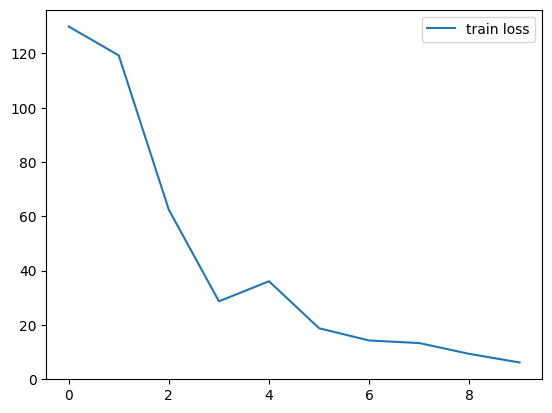

In [ ]:
criterian = nn.MSELoss()
# define optimozer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2,threshold=0.1,min_lr=1e-6,verbose=True,threshold_mode='rel' )

epochs = 10
total_loss = []
model.train()
for epoch in range(epochs):
  total_loss_ = 0
  for i in range(len(data)):
    X = data
    # print(X[0])
    Y = y
    # print("y shape", Y.shape)

    logit = model(X)
    # print("logit", logit)
    loss = criterian(logit, Y)
    # print(loss.item())
    total_loss_+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  lr_scheduler.step(np.mean(total_loss_/(i+1)))
  total_loss.append(np.mean(total_loss_/(i+1)))
  print(f"Traing Epoch: {epoch+1} loss {np.mean(total_loss_/(i+1))}, Learning Rate: {optimizer.param_groups[0]['lr']}")
plt.plot(range(epochs), total_loss, label="train loss")
plt.legend()




In [ ]:
import torch
import torch.nn as nn
import torch.hub
import torch.nn.functional as F
class ModifiedResNet(nn.Module):
    def __init__(self, resnet_ = 'resnet50', input_channels=13, out_channels=1):
        super(ModifiedResNet, self).__init__()
        # Load the ResNet-34 architecture without pre-trained weights
        self.resnet = torch.hub.load('pytorch/vision:v0.10.0', resnet_, pretrained=False)

        # Modify the first layer to accept the specified number of input channels
        self.resnet.conv1 = nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Modify the fully connected layer for regression (assuming 1 output for mass regression)
        out_feather = {'resnet18': 512, 'resnet34': 512, 'resnet50': 2048,'resnet101':2048, 'resnet152':2048}.get(resnet_, None)
        self.resnet.fc = nn.Linear(out_feather, out_channels)

    def forward(self, x):
        return self.resnet(x)

In [ ]:
# ResNet18 = ModifiedResNet(resnet_='resnet18',input_channels=13)
# ResNet34 = ModifiedResNet(resnet_='resnet34',input_channels=13)
# ResNet50 = ModifiedResNet(resnet_='resnet50',input_channels=13)
# ResNet101 = ModifiedResNet(resnet_='resnet101',input_channels=13)
model = ModifiedResNet(resnet_='resnet101',input_channels=13)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


Traing Epoch: 1 loss 65.49971199035645, Learning Rate: 0.001
Traing Epoch: 2 loss 13.875449562072754, Learning Rate: 0.001
Traing Epoch: 3 loss 1.1946871995925903, Learning Rate: 0.001
Traing Epoch: 4 loss 0.285673001408577, Learning Rate: 0.001
Traing Epoch: 5 loss 0.08977030594833195, Learning Rate: 0.001
Traing Epoch: 6 loss 0.01817471468821168, Learning Rate: 0.001
Traing Epoch: 7 loss 0.007051851740106941, Learning Rate: 0.001
Traing Epoch: 8 loss 0.001864875794854015, Learning Rate: 0.001
Traing Epoch: 9 loss 0.0007347634353209286, Learning Rate: 0.001
Traing Epoch: 10 loss 0.0004007544834166765, Learning Rate: 0.001


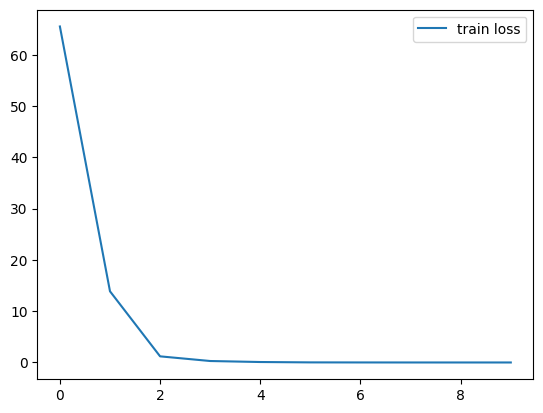

In [ ]:
criterian = nn.MSELoss()
# define optimozer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2,threshold=0.1,min_lr=1e-6,verbose=True,threshold_mode='rel' )

epochs = 10
total_loss = []
model.train()
for epoch in range(epochs):
  total_loss_ = 0
  for i in range(len(data)):
    X = data
    # print(X[0])
    Y = y
    # print("y shape", Y.shape)

    logit = model(X)
    # print("logit", logit)
    loss = criterian(logit, Y)
    # print(loss.item())
    total_loss_+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  lr_scheduler.step(np.mean(total_loss_/(i+1)))
  total_loss.append(np.mean(total_loss_/(i+1)))
  print(f"Traing Epoch: {epoch+1} loss {np.mean(total_loss_/(i+1))}, Learning Rate: {optimizer.param_groups[0]['lr']}")
plt.plot(range(epochs), total_loss, label="train loss")
plt.legend()

In [22]:
### Efficient nets

import timm
#timm.list_models()

In [55]:
in_channels=13
model1 = timm.create_model(f"efficientnet_b0",num_classes=1)
model1.conv_stem = nn.Conv2d(in_channels,
                            model1.conv_stem.out_channels,
                            model1.conv_stem.kernel_size,
                            model1.conv_stem.stride,
                            model1.conv_stem.padding,
                            bias = False
                            )

In [77]:
import timm
import torch
in_channels=5
model = timm.create_model('resnet18')
#print(model)
model.conv1 = nn.Conv2d(in_channels, model.conv1.out_channels, kernel_size=model.conv1.kernel_size,
                        stride=model.conv1.stride, padding=model.conv1.padding, bias=False)
# Modify the final layer for regression
model.fc = nn.Linear(model.fc.in_features, 1)
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {num_params}')
x = torch.randn(10, in_channels, 125, 125)
model(x).shape

Total number of parameters: 11183297


torch.Size([10, 1])

In [84]:
timm.list_models("coat*")

['coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_rw_224',
 'coatnet_rmlp_2_rw_224',
 'coatnet_rmlp_2_rw_384',
 'coatnet_rmlp_3_rw_224',
 'coatnet_rmlp_nano_rw_224',
 'coatnext_nano_rw_224']

In [7]:
in_channels=13
model = timm.create_model('coatnet_0_224')
#print(model)
model.stem.conv1 = nn.Conv2d(in_channels, model.stem.conv1.out_channels, kernel_size=model.stem.conv1.kernel_size,
                        stride=model.stem.conv1.stride, padding=model.stem.conv1.padding, bias=False)
# Modify the final layer for regression
model.head.fc = nn.Linear(model.head.fc.in_features, 1)
model.to(device)
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {num_params}')
# x = torch.randn(10, in_channels, 125, 125)
# x = F.interpolate(x, size=(224, 224),  mode='bilinear')
# print(x.shape)
# # x = torch.randn(10, in_channels, 224, 224)
# print(model(x).shape)

Total number of parameters: 24274349


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


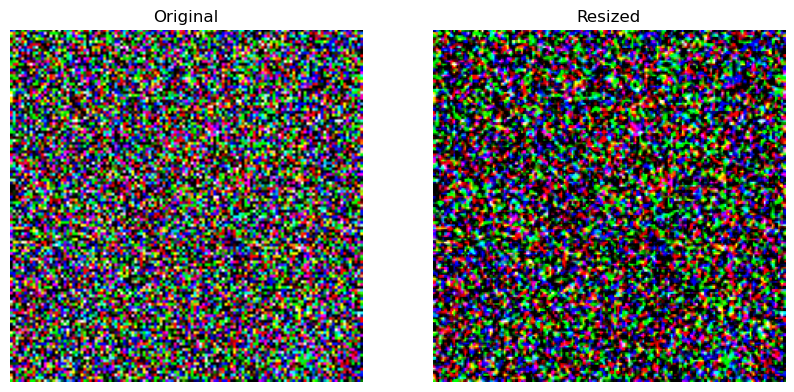

In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(img1, img2, title1='Original', title2='Resized'):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1.permute(1, 2, 0).numpy())
    axs[0].set_title(title1)
    axs[0].axis('off')
    
    axs[1].imshow(img2.permute(1, 2, 0).numpy())
    axs[1].set_title(title2)
    axs[1].axis('off')
    
    plt.show()

# Create a random image tensor with shape (channels, height, width)
# For simplicity, let's create an image with 3 channels (RGB)
img = torch.randn(3, 125, 125)

# Resize the image to (224, 224) using bilinear interpolation
img_resized = F.interpolate(img.unsqueeze(0), size=(224, 224), mode='bilinear', align_corners=False).squeeze(0)

# Plot the original and resized images
plot_images(img, img_resized)



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import timm

# Define the number of input channels
in_channels = 13

# Create a subclass of the CoAtNet model
class CustomCoAtNet(nn.Module):
    def __init__(self, in_channels=13, coatnet='coatnet_0_224'):
        super(CustomCoAtNet, self).__init__()
        self.model = timm.create_model(f'{coatnet}')
        
        # Modify the stem layer to accept `in_channels`
        self.model.stem.conv1 = nn.Conv2d(in_channels, self.model.stem.conv1.out_channels, kernel_size=self.model.stem.conv1.kernel_size,
                                          stride=self.model.stem.conv1.stride, padding=self.model.stem.conv1.padding, bias=False)
        
        # Modify the final layer for regression
        self.model.head.fc = nn.Linear(self.model.head.fc.in_features, 1)

    def forward(self, x):
        # Resize the input tensor to (224, 224) within the forward method
        x = F.interpolate(x, size=(224, 224), mode='bilinear')
        return self.model(x)

# Instantiate the custom model
model = CustomCoAtNet(in_channels=13, coatnet='coatnet_0_224')
model.to(device)
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {num_params}')
# Create a random input tensor with shape (10, in_channels, 125, 125)
# x = torch.randn(10, in_channels, 125, 125)

# # Pass the input tensor through the custom model
# output = model(x)

# # Print the output shape
# print(output.shape)  # Should print: torch.Size([10, 1])


In [79]:
model = timm.create_model('maxxvit_base')

RuntimeError: Unknown model (maxxvit_base)

In [61]:
criterian = nn.MSELoss()
# define optimozer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2,threshold=0.1,min_lr=1e-6,verbose=True,threshold_mode='rel' )
epochs = 10
total_loss = []
alpha = 0.99
lamb = 2

model1.train()
for epoch in range(epochs):
  total_loss_ = 0

  x = data
  Y = y
  #print("y", Y.shape)

  logit = model(x)
  #print("logit", logit)
  loss = criterian(logit, Y)
  # print(loss.item())
  total_loss_+=loss.item()
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()
  lr_scheduler.step(np.mean(total_loss_/(i+1)))
  total_loss.append(np.mean(total_loss_/(i+1)))
  print(f"Traing Epoch: {epoch+1} loss {np.mean(total_loss_/(i+1))}, Learning Rate: {optimizer.param_groups[0]['lr']}")
plt.plot(range(epochs), total_loss)



/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[5, 13, 125, 125] to have 3 channels, but got 13 channels instead

In [45]:
data.shape

torch.Size([5, 13, 125, 125])